<a href="https://colab.research.google.com/github/Billysanchez/Primer-repositorio/blob/main/TAREA2BA2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elementos del informe

Motivación y Contexto: 5 puntos

Proporciona una explicación detallada de la motivación detrás de la elección del problema. Explica el contexto y la importancia del problema que se pretende resolver. ¿Por qué es significativo y quiénes podrían beneficiarse de la solución?

Descripción de los Datos: 20 puntos

-Describe el conjunto de datos que has elegido. Se debe incluir información sobre la fuente de los datos, el tipo de datos, el número de registros y las características (columnas) incluidas en el conjunto de datos.
Discute los pasos de preprocesamiento que hayas realizado.
Incluye tablas o gráficos para la visualización.

#Pregunta del Proyecto: 10 puntos

Formula una pregunta de proyecto clara y concisa basada en el conjunto de datos elegido. Toma en consideración: ¿Qué problema específico estás tratando de resolver? ¿Estás prediciendo o clasificando? ¿Cuál es la variable objetivo y qué características utilizarás para predecirla?

Modelos: 30 puntos

Implementa y compara el rendimiento de los siguientes modelos:

Machine Learning Clásico:
Modelo Base: Regresión Logística o Regresión Lineal (dependiendo del tipo de problema), o alguna versión de Naive Bayes.
Modelo Avanzado: por ejemplo, Random Forest o Gradient Boosting.
Deep Learning:
Modelo Base: Red Neuronal Simple (MLP - Perceptrón Multicapa).
Modelo Avanzado: por ejemplo, Red Neuronal Convolucional (CNN) o Red Neuronal Recurrente (RNN).
Describe brevemente cada modelo, su propósito y cómo funciona. Proporciona los detalles de la implementación y fragmentos de código relevantes. Debes incluir referencias bibliográficas en este apartado.

Resultados: 15 puntos

Presenta los resultados de los modelos, utilizando métricas adecuadas para evaluar el rendimiento (por ejemplo, precisión, recall, F1 score para clasificación; RMSE, MAE para regresión). Compara los resultados de los modelos base y avanzados.
Incluye tablas o gráficos para la visualización.

Limitaciones y Trabajo Futuro: 5 puntos

Discute las limitaciones del enfoque actual y sugiere posibles mejoras o trabajos futuros que podrían realizarse para abordar estas limitaciones. Considera aspectos como el rendimiento del modelo, la calidad de los datos, la selección de características y los recursos computacionales.

Referencias: 5 puntos

Todas las referencias y recursos que utilizaste durante este proyecto, incluidos artículos académicos, libros, tutoriales en línea y bases de datos complementarias. Sigue un formato de citación estándar (APA, MLA, etc.).

Consejos Útiles:

Comienza con una comprensión clara del problema que deseas resolver, luego de explorar a grandes rasgos cada base de datos propuesta.
Elige un conjunto de datos que se alinee con tus intereses y que sea manejable dentro del tiempo dado, tus conocimientos previos y los conocimientos adquiridos durante el semestre.
Pon atención al preprocesamiento de datos; los datos limpios se traducen en un mejor rendimiento del modelo.
Ten en cuenta que las visualizaciones pueden mejorar en gran medida la comprensión de los resultados.
¡Buena suerte!

#bibliotecas y preproceso


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import torch
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/MyDrive/BA_2/2024

/gdrive/MyDrive/BA_2/2024


In [ ]:
data = pd.read_csv('house.csv')

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df = data.copy()

In [ ]:
df = df.rename(columns={'price': 'precio'})

In [ ]:
print(df['precio'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: precio, Length: 21613, dtype: float64


In [ ]:
df.columns

Index(['id', 'date', 'precio', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.shape

(21613, 21)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id               0
date             0
precio           0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# Filtrar los datos
df = df[(df['bathrooms'] > 0) & (df['bathrooms'] <= 30) & (df['bedrooms'] > 0) & (df['bedrooms'] <= 30)]
# Verificar la cantidad de filas antes y después de filtrar
print(f'Cantidad de filas antes de filtrar: {df.shape[0]}')
print(f'Cantidad de filas después de filtrar: {df.shape[0]}')

Cantidad de filas antes de filtrar: 21596
Cantidad de filas después de filtrar: 21596


Estadísticas Descriptivas:
                 id        precio      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.401983e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.671416e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  21596.000000   
mean   1.509983e+04      1.494119      0.007548      0.234303      3.409752   
std    4.141355e+04     

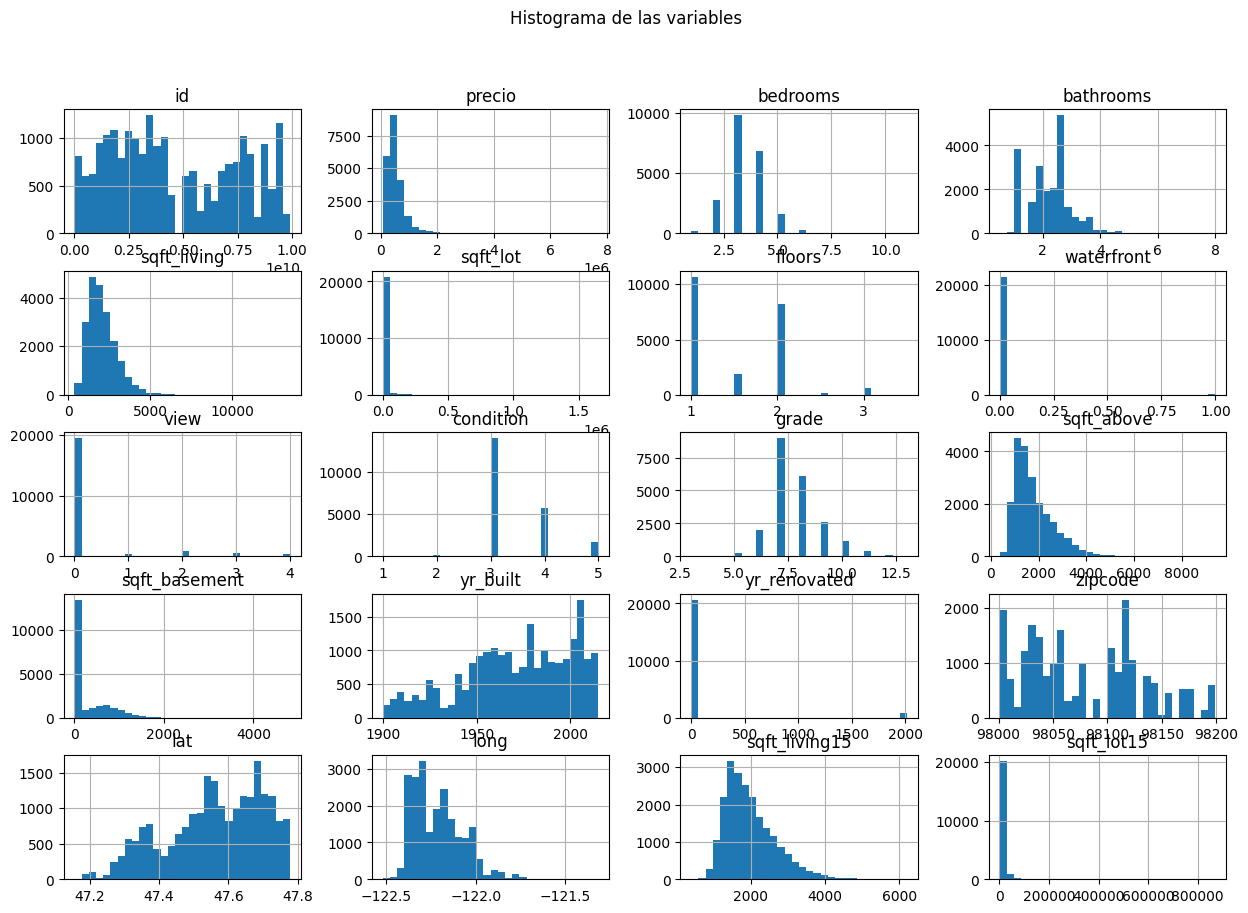

In [ ]:
# Estadísticas descriptivas básicas
descriptive_stats = df.describe()
print("Estadísticas Descriptivas:")
print(descriptive_stats)
# Histogramas para la distribución de datos
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograma de las variables')
plt.show()

#REGRESION LINEAL

Error Cuadrático Medio de la Raíz (Regresión Lineal - Escala Normalizada): 0.5409149613453701
Mean Absolute Error (MAE) (Regresión Lineal - Escala Normalizada): 0.3413278878490223
Coeficiente de Determinación R^2 (Regresión Lineal - Escala Normalizada): 0.6965015998089696


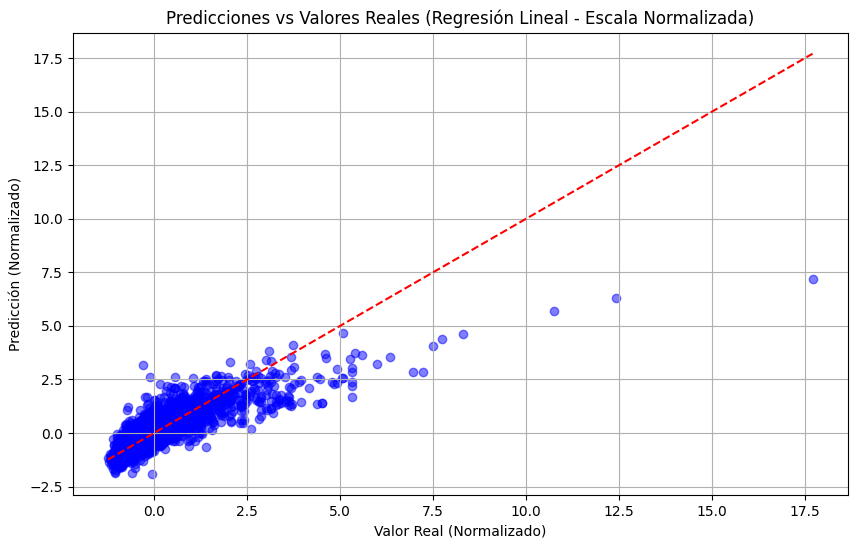

In [ ]:
# Definir características (features) y variable objetivo (target)
variables = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'zipcode'
]
X = df[variables]
Y = df['precio']
# 1. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# 2. Normalizar las características del conjunto de entrenamiento
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
# 3. Normalizar las características del conjunto de prueba usando el mismo scaler
X_test_scaled = scaler_X.transform(X_test)
# 4. Normalizar la variable objetivo del conjunto de entrenamiento
scaler_Y = StandardScaler()
y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# 5. Normalizar la variable objetivo del conjunto de prueba usando el mismo scaler
y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()
#6. Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
# 7. Hacer predicciones en el conjunto de prueba
y_pred_scaled = model.predict(X_test_scaled)
# 8. Calcular el Error Cuadrático Medio de la Raíz (RMSE) en la escala normalizada
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'Error Cuadrático Medio de la Raíz (Regresión Lineal - Escala Normalizada): {rmse}')

# Calcular MAE en la escala normalizada
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'Mean Absolute Error (MAE) (Regresión Lineal - Escala Normalizada): {mae}')

# Calcular R^2 en la escala normalizada
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'Coeficiente de Determinación R^2 (Regresión Lineal - Escala Normalizada): {r2}')

# 9. Graficar las predicciones vs los valores reales en la escala normalizada
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_scaled, color='blue', alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], linestyle='--', color='red')
plt.xlabel('Valor Real (Normalizado)')
plt.ylabel('Predicción (Normalizado)')
plt.title('Predicciones vs Valores Reales (Regresión Lineal - Escala Normalizada)')
plt.grid(True)

#RANDOM FOREST

Random Forest - Error Cuadrático Medio Raíz (RMSE): 0.3369907298010271
Random Forest - Mean Absolute Error (MAE): 0.183755385954609
Random Forest - Coeficiente de Determinación R^2: 0.8822029738447051


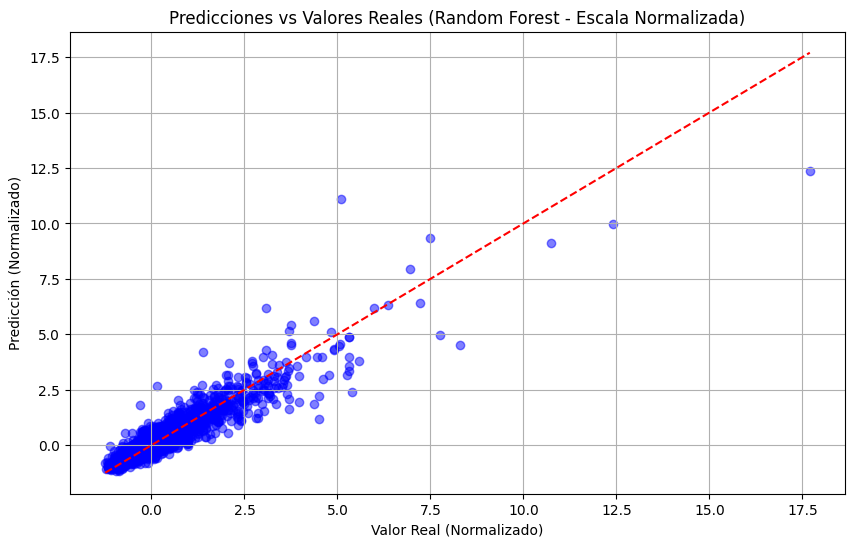

      Predicción (Normalizado)  Valor Real (Normalizado)
0                    -0.926079                 -1.108968
1                    -0.495837                 -0.342254
2                    -0.315507                 -0.127846
3                    -0.519692                 -0.505096
4                     0.087866                  0.176126
...                        ...                       ...
4315                 -0.943930                 -0.993622
4316                 -0.490119                 -0.396671
4317                 -0.071419                 -0.282546
4318                 -0.723680                 -0.673366
4319                 -0.318240                 -0.672098

[4320 rows x 2 columns]


In [ ]:
#RANDOM FOREST
# Definir características (features) y variable objetivo (target)
variables = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'zipcode'
]
X = df[variables]
Y = df['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizar las características del conjunto de entrenamiento
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)

# Normalizar las características del conjunto de prueba usando el mismo scaler
X_test_scaled = scaler_X.transform(X_test)

# Normalizar la variable objetivo del conjunto de entrenamiento
scaler_Y = StandardScaler()
y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Normalizar la variable objetivo del conjunto de prueba usando el mismo scaler
y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()

# Ajustar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)

# Realizar predicciones en el conjunto de prueba
y_pred_rf_scaled = rf_model.predict(X_test_scaled)

# Calcular el error cuadrático medio raíz (RMSE) en la escala normalizada
rmse_rf_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_scaled))
print(f'Random Forest - Error Cuadrático Medio Raíz (RMSE): {rmse_rf_scaled}')

# Calcular MAE en la escala normalizada
mae_rf_scaled = mean_absolute_error(y_test_scaled, y_pred_rf_scaled)
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf_scaled}')

# Calcular R^2 en la escala normalizada
r2_rf_scaled = r2_score(y_test_scaled, y_pred_rf_scaled)
print(f'Random Forest - Coeficiente de Determinación R^2: {r2_rf_scaled}')

# Graficar las predicciones vs los valores reales en la escala normalizada
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_rf_scaled, color='blue', alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], linestyle='--', color='red')
plt.xlabel('Valor Real (Normalizado)')
plt.ylabel('Predicción (Normalizado)')
plt.title('Predicciones vs Valores Reales (Random Forest - Escala Normalizada)')
plt.grid(True)
plt.show()

# Imprimir predicciones y valores reales
predicciones_rf_scaled = pd.DataFrame({'Predicción (Normalizado)': y_pred_rf_scaled, 'Valor Real (Normalizado)': y_test_scaled})
print(predicciones_rf_scaled)

#DEEP LEARNING

##NEURONA SIMPLONA

Epoch 1/50
540/540 [==============================] - 2s 3ms/step - loss: 1.2114 - val_loss: 0.6742
Epoch 2/50
540/540 [==============================] - 1s 2ms/step - loss: 0.4968 - val_loss: 0.3773
Epoch 3/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3434 - val_loss: 0.3060
Epoch 4/50
540/540 [==============================] - 2s 3ms/step - loss: 0.3086 - val_loss: 0.2956
Epoch 5/50
540/540 [==============================] - 2s 3ms/step - loss: 0.3018 - val_loss: 0.2939
Epoch 6/50
540/540 [==============================] - 1s 3ms/step - loss: 0.3012 - val_loss: 0.2927
Epoch 7/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3004 - val_loss: 0.2952
Epoch 8/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3005 - val_loss: 0.2944
Epoch 9/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3011 - val_loss: 0.2928
Epoch 10/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3007 - val_loss: 0.2924

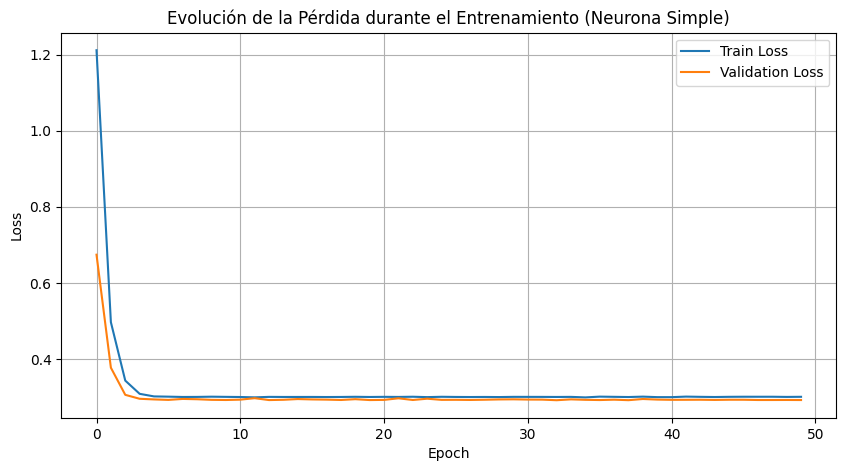

In [ ]:
# Definir el modelo de neurona simple
model = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],))
])
# Compilar el modelo
model.compile(optimizer=Adam(), loss='mean_squared_error')
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))
# Evaluar el modelo en el conjunto de prueba
y_pred_nn_scaled = model.predict(X_test_scaled).flatten()
rmse_nn_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_nn_scaled))
print(f'Simple Neuron - Error Cuadrático Medio Raíz (RMSE): {rmse_nn_scaled}')
# Calcular MAE en la escala normalizada
mae_nn_scaled = mean_absolute_error(y_test_scaled, y_pred_nn_scaled)
print(f'Simple Neuron - Mean Absolute Error (MAE): {mae_nn_scaled}')
# Calcular R^2 en la escala normalizada
r2_nn_scaled = r2_score(y_test_scaled, y_pred_nn_scaled)
print(f'Simple Neuron - Coeficiente de Determinación R^2: {r2_nn_scaled}')
# Imprimir las primeras predicciones y valores reales en la escala normalizada
predicciones_nn_scaled = pd.DataFrame({'Predicción (Normalizado)': y_pred_nn_scaled[:10], 'Valor Real (Normalizado)': y_test_scaled[:10]})
print(predicciones_nn_scaled)
# Obtener las pérdidas de entrenamiento y validación del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento (Neurona Simple)')
plt.grid(True)
plt.show()

##RED NEURONAL BASICA

Epoch 1/50
540/540 [==============================] - 2s 2ms/step - loss: 0.3446 - val_loss: 0.2534
Epoch 2/50
540/540 [==============================] - 1s 2ms/step - loss: 0.2262 - val_loss: 0.2182
Epoch 3/50
540/540 [==============================] - 1s 2ms/step - loss: 0.2066 - val_loss: 0.2052
Epoch 4/50
540/540 [==============================] - 1s 2ms/step - loss: 0.1937 - val_loss: 0.2021
Epoch 5/50
540/540 [==============================] - 2s 3ms/step - loss: 0.1850 - val_loss: 0.1833
Epoch 6/50
540/540 [==============================] - 2s 3ms/step - loss: 0.1761 - val_loss: 0.1789
Epoch 7/50
540/540 [==============================] - 2s 3ms/step - loss: 0.1680 - val_loss: 0.1702
Epoch 8/50
540/540 [==============================] - 1s 2ms/step - loss: 0.1622 - val_loss: 0.1676
Epoch 9/50
540/540 [==============================] - 1s 2ms/step - loss: 0.1573 - val_loss: 0.1576
Epoch 10/50
540/540 [==============================] - 1s 3ms/step - loss: 0.1521 - val_loss: 0.1508

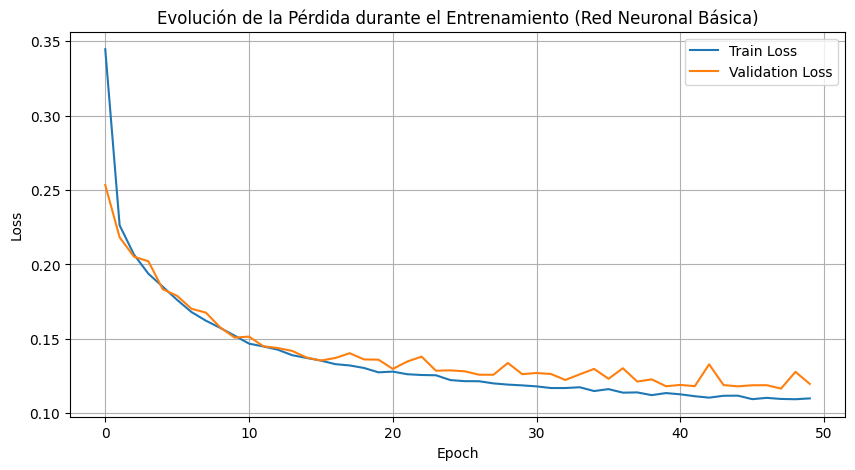

In [ ]:
#red nueronal basica
# Definir el modelo
model_basico = Sequential([
    Dense(32, input_shape=(X_train.shape[1],)),
    Activation('relu'),
    Dense(1)
])
# Compilar el modelo
model_basico.compile(optimizer='adam', loss='mean_squared_error')
# Entrenar el modelo
history_basico = model_basico.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))
# Obtener las pérdidas de entrenamiento y validación del historial
train_loss_basico = history_basico.history['loss']
val_loss_basico = history_basico.history['val_loss']
# Calcular RMSE, MAE y R² en los datos escalados
rmse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
print(f'RMSE (scaled): {rmse_scaled}')
print(f'MAE (scaled): {mae_scaled}')
print(f'R² (scaled): {r2_scaled}')
# Graficar la evolución de la pérdida durante el entrenamiento (Red Neuronal Básica)
plt.figure(figsize=(10, 5))
plt.plot(train_loss_basico, label='Train Loss')
plt.plot(val_loss_basico, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento (Red Neuronal Básica)')
plt.grid(True)
plt.show()

##RED NEURONAL AVANZADA

Epoch 1/50
540/540 [==============================] - 4s 6ms/step - loss: 0.4237 - val_loss: 0.2289
Epoch 2/50
540/540 [==============================] - 2s 3ms/step - loss: 0.2955 - val_loss: 0.2039
Epoch 3/50
540/540 [==============================] - 2s 4ms/step - loss: 0.2607 - val_loss: 0.1914
Epoch 4/50
540/540 [==============================] - 3s 5ms/step - loss: 0.2460 - val_loss: 0.1877
Epoch 5/50
540/540 [==============================] - 2s 4ms/step - loss: 0.2352 - val_loss: 0.1586
Epoch 6/50
540/540 [==============================] - 2s 3ms/step - loss: 0.2243 - val_loss: 0.1589
Epoch 7/50
540/540 [==============================] - 1s 3ms/step - loss: 0.2225 - val_loss: 0.1664
Epoch 8/50
540/540 [==============================] - 1s 3ms/step - loss: 0.2180 - val_loss: 0.1541
Epoch 9/50
540/540 [==============================] - 1s 3ms/step - loss: 0.2105 - val_loss: 0.1452
Epoch 10/50
540/540 [==============================] - 1s 2ms/step - loss: 0.1985 - val_loss: 0.1385

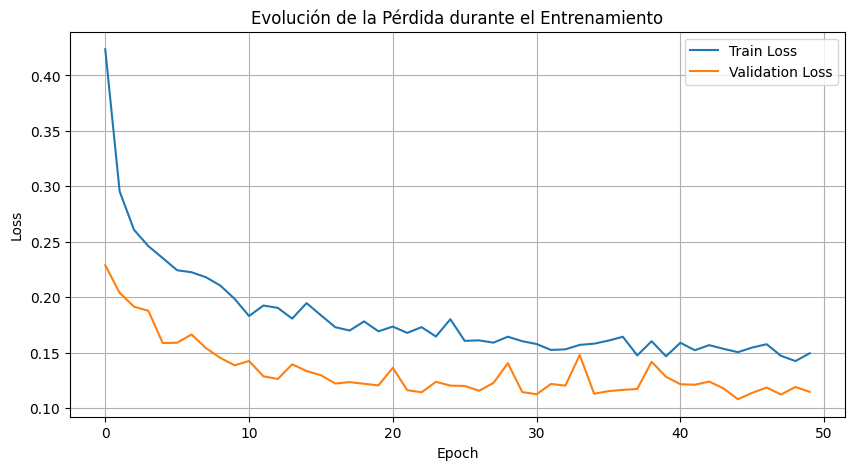

135/135 [==============================] - 0s 1ms/step
Advanced Neural Network - Error Cuadrático Medio Raíz (RMSE): 0.3385306198836549
   Predicción (Normalizado)  Valor Real (Normalizado)
0                 -0.814195                 -1.108968
1                 -0.239828                 -0.342254
2                 -0.447690                 -0.127846
3                 -0.481934                 -0.505096
4                 -0.020339                  0.176126
5                  0.173404                  0.268403
6                 -0.781705                 -0.772428
7                  1.551391                  1.134178
8                  0.014297                 -0.260833
9                 -0.546206                 -0.779213
135/135 [==============================] - 0s 2ms/step
Advanced Neural Network - Error Absoluto Medio (MAE): 0.20171547643219684
Advanced Neural Network - R cuadrado (R2 Score): 0.881123959496668
   Predicción (Normalizado)  Valor Real (Normalizado)
0                 -0

In [ ]:
#RED NEURONAL AVANZADA
# Definir el modelo
model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],)),  # Primera capa oculta con 64 neuronas y entrada de tamaño X_train_scaled.shape[1]
    Activation('relu'),                               # Función de activación ReLU
    Dropout(0.3),                                      # Capa de dropout con tasa de 0.3
    Dense(32),                                         # Segunda capa oculta con 32 neuronas
    Activation('relu'),                               # Función de activación ReLU
    Dropout(0.3),                                      # Otra capa de dropout
    Dense(1)                                           # Capa de salida con 1 neurona para la predicción de precio
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Obtener las pérdidas de entrenamiento y validación del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.grid(True)
plt.show()

# Evaluar el modelo en el conjunto de prueba
y_pred_ann_scaled = model.predict(X_test_scaled).flatten()
rmse_ann_scaled = np.sqrt(mean_squared_error(y_test_scaled, y_pred_ann_scaled))
print(f'Advanced Neural Network - Error Cuadrático Medio Raíz (RMSE): {rmse_ann_scaled}')

# Imprimir las primeras predicciones y valores reales en la escala normalizada
predicciones_ann_scaled = pd.DataFrame({'Predicción (Normalizado)': y_pred_ann_scaled[:10], 'Valor Real (Normalizado)': y_test_scaled[:10]})
print(predicciones_ann_scaled)
# Evaluar el modelo en el conjunto de prueba
y_pred_ann_scaled = model.predict(X_test_scaled).flatten()

# Calcular el Error Absoluto Medio (MAE)
mae_ann_scaled = mean_absolute_error(y_test_scaled, y_pred_ann_scaled)
print(f'Advanced Neural Network - Error Absoluto Medio (MAE): {mae_ann_scaled}')

# Calcular R cuadrado (R2)
r2_ann_scaled = r2_score(y_test_scaled, y_pred_ann_scaled)
print(f'Advanced Neural Network - R cuadrado (R2 Score): {r2_ann_scaled}')

# Imprimir las primeras predicciones y valores reales en la escala normalizada
predicciones_ann_scaled = pd.DataFrame({'Predicción (Normalizado)': y_pred_ann_scaled[:10], 'Valor Real (Normalizado)': y_test_scaled[:10]})
print(predicciones_ann_scaled)

##RNN

Epoch 1/50
108/108 [==============================] - 2s 9ms/step - loss: 0.6924 - val_loss: 0.7129
Epoch 2/50
108/108 [==============================] - 1s 8ms/step - loss: 0.6680 - val_loss: 0.7163
Epoch 3/50
108/108 [==============================] - 1s 8ms/step - loss: 0.6620 - val_loss: 0.7055
Epoch 4/50
108/108 [==============================] - 1s 7ms/step - loss: 0.6609 - val_loss: 0.7087
Epoch 5/50
108/108 [==============================] - 1s 8ms/step - loss: 0.6574 - val_loss: 0.7126
Epoch 6/50
108/108 [==============================] - 1s 7ms/step - loss: 0.6630 - val_loss: 0.7065
Epoch 7/50
108/108 [==============================] - 1s 5ms/step - loss: 0.6579 - val_loss: 0.7144
Epoch 8/50
108/108 [==============================] - 0s 4ms/step - loss: 0.6562 - val_loss: 0.7127
Epoch 9/50
108/108 [==============================] - 1s 5ms/step - loss: 0.6577 - val_loss: 0.7096
Epoch 10/50
108/108 [==============================] - 0s 5ms/step - loss: 0.6567 - val_loss: 0.7075

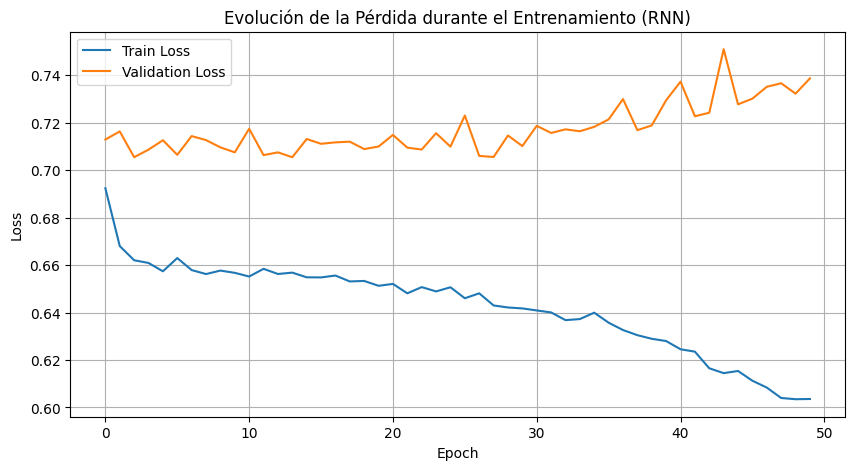

In [ ]:
# Función para preparar secuencias de datos
def prepare_sequences(data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10  # Longitud de la secuencia
# Preparar secuencias de datos
X_seq, y_seq = prepare_sequences(y_pred_nn_scaled, seq_length)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
# Definir la arquitectura de la RNN
model = Sequential([
    SimpleRNN(units=50, input_shape=(seq_length, 1)),
    Dense(1)
])
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
# Entrenar el modelo
history = model.fit(X_train.reshape(-1, seq_length, 1), y_train, epochs=50, batch_size=32, validation_data=(X_test.reshape(-1, seq_length, 1), y_test))
# Hacer predicciones en el conjunto de prueba
y_pred_scaled = model.predict(X_test.reshape(-1, seq_length, 1)).flatten()
# Calcular el Error Cuadrático Medio Raíz (RMSE) en la escala normalizada
rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f'Error Cuadrático Medio Raíz (RMSE): {rmse}')

# Obtener las pérdidas de entrenamiento y validación del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Hacer predicciones en el conjunto de prueba
y_pred_rnn_scaled = model.predict(X_test.reshape(-1, seq_length, 1)).flatten()

# Calcular el Error Absoluto Medio (MAE)
mae_rnn_scaled = mean_absolute_error(y_test, y_pred_rnn_scaled)
print(f'RNN - Error Absoluto Medio (MAE): {mae_rnn_scaled}')

# Calcular R cuadrado (R2)
r2_rnn_scaled = r2_score(y_test, y_pred_rnn_scaled)
print(f'RNN - R cuadrado (R2 Score): {r2_rnn_scaled}')

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento (RNN)')
plt.grid(True)
plt.show()

#RED NEURONAL AVANZACA CON PYTORCH

In [ ]:
#RED NEURONAL AVANZACA CON PYTORCH
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Dividir los datos en conjuntos de entrenamiento y prueba ANTES DE NORMALIZAR
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Normalizar las características y la variable objetivo
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()
# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

Epoch [100/500], Loss: 0.2849
Epoch [200/500], Loss: 0.2298
Epoch [300/500], Loss: 0.1914
Epoch [400/500], Loss: 0.1702
Epoch [500/500], Loss: 0.1606
Test Loss (scaled): 0.1338, RMSE (scaled): 0.3658
Test Loss (scaled): 0.1338, RMSE (scaled): 0.3658
MAE (scaled): 0.2170
R2 Score (scaled): 0.8612


NameError: name 'test_losses' is not defined

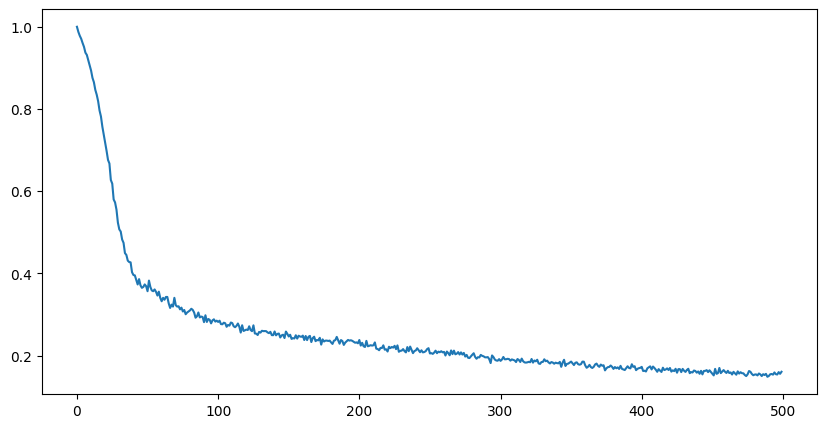

In [ ]:
# Definir la arquitectura de la red neuronal
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)   # Capa oculta con 64 neuronas
        self.dropout1 = nn.Dropout(0.3)              # Capa de dropout con tasa de 0.3
        self.fc2 = nn.Linear(64, 32)                 # Segunda capa oculta con 32 neuronas
        self.dropout2 = nn.Dropout(0.3)              # Otra capa de dropout
        self.fc3 = nn.Linear(32, 16)                 # Nueva capa oculta con 16 neuronas
        self.fc4 = nn.Linear(16, 1)                  # Capa de salida con 1 neurona para la predicción de precio

    def forward(self, x):
        x = F.relu(self.fc1(x))                      # Función de activación ReLU
        x = self.dropout1(x)                         # Aplicar dropout
        x = F.relu(self.fc2(x))                      # Función de activación ReLU
        x = self.dropout2(x)                         # Aplicar dropout
        x = F.relu(self.fc3(x))                      # Función de activación ReLU en la nueva capa oculta
        x = self.fc4(x)                              # Capa de salida
        return x
# Instanciar el modelo
model = RedNeuronal()

# Almacenar las pérdidas durante el entrenamiento
train_losses = []
# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Entrenamiento del modelo
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.flatten(), y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Evaluar el modelo en los datos de prueba y calcular RMSE
model.eval()
with torch.no_grad():
    predicted_scaled = model(X_test_tensor).numpy()
    test_loss = criterion(torch.tensor(predicted_scaled.flatten()), y_test_tensor)
    rmse = torch.sqrt(test_loss)
    print(f'Test Loss (scaled): {test_loss.item():.4f}, RMSE (scaled): {rmse.item():.4f}')
# Evaluar el modelo en los datos de prueba y calcular RMSE
model.eval()
with torch.no_grad():
    predicted_scaled = model(X_test_tensor).numpy()
    test_loss = criterion(torch.tensor(predicted_scaled.flatten()), y_test_tensor)
    rmse = torch.sqrt(test_loss)
    print(f'Test Loss (scaled): {test_loss.item():.4f}, RMSE (scaled): {rmse.item():.4f}')

    # Calcular MAE (Error Absoluto Medio)
    mae = mean_absolute_error(y_test_scaled, predicted_scaled.flatten())
    print(f'MAE (scaled): {mae:.4f}')

    # Calcular R cuadrado (R2)
    r2 = r2_score(y_test_scaled, predicted_scaled.flatten())
    print(f'R2 Score (scaled): {r2:.4f}')
# Graficar la evolución de la pérdida durante el entrenamiento y prueba
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

##red pytorch v2.0

In [ ]:
# Definir una función de activación Swish
def swish(x):
    return x * torch.sigmoid(x)

# Definir la arquitectura de la red neuronal
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 64)  # Capa oculta con 64 neuronas
        self.dropout1 = nn.Dropout(0.3)                   # Capa de dropout con tasa de 0.3
        self.fc2 = nn.Linear(64, 32)                      # Segunda capa oculta con 32 neuronas
        self.dropout2 = nn.Dropout(0.3)                   # Otra capa de dropout
        self.fc3 = nn.Linear(32, 1)                       # Capa de salida con 1 neurona para la predicción de precio

    def forward(self, x):
        x = swish(self.fc1(x))         # Aplicar Swish como función de activación en la primera capa oculta
        x = self.dropout1(x)           # Aplicar dropout después de la primera capa
        x = F.relu(self.fc2(x))        # Función de activación ReLU en la segunda capa oculta
        x = self.dropout2(x)           # Aplicar dropout después de la segunda capa
        x = self.fc3(x)                # Capa de salida lineal
        return x

# Crear instancia del modelo
model = RedNeuronal()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Configuración del early stopping
early_stopping_patience = 10
early_stopping_min_delta = 0.0001
best_loss = float('inf')
early_stopping_counter = 0

# Listas para almacenar las pérdidas
train_losses = []
test_losses = []

# Entrenamiento del modelo
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.flatten(), y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())  # Guardar la pérdida de entrenamiento

    # Validación en el conjunto de prueba
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs.flatten(), y_test_tensor)
        test_losses.append(test_loss.item())  # Guardar la pérdida de prueba

    # Imprimir estadísticas
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    # Implementar early stopping
    if test_loss < best_loss - early_stopping_min_delta:
        best_loss = test_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= early_stopping_patience:
        print(f'Early stopping en la época {epoch+1}')
        break

# Evaluar el modelo en los datos de prueba y calcular RMSE, MAE y R2
model.eval()
with torch.no_grad():
    predicted_scaled = model(X_test_tensor).numpy()
    test_loss = criterion(torch.tensor(predicted_scaled.flatten()), y_test_tensor)
    rmse = torch.sqrt(test_loss)
    print(f'Test Loss (scaled): {test_loss.item():.4f}, RMSE (scaled): {rmse.item():.4f}')

    # Calcular MAE (Error Absoluto Medio)
    mae = mean_absolute_error(y_test_scaled, predicted_scaled.flatten())
    print(f'MAE (scaled): {mae:.4f}')

    # Calcular R cuadrado (R2)
    r2 = r2_score(y_test_scaled, predicted_scaled.flatten())
    print(f'R2 Score (scaled): {r2:.4f}')

# Guardar el modelo (opcional)
torch.save(model.state_dict(), 'house_price_model.pth')

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.grid(True)
plt.show()

#RED NEURONAL DEFINITIVA

In [ ]:
# Definir la arquitectura de la red neuronal
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.dropout1 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(64, 32)
        self.dropout3 = nn.Dropout(0.25)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
# Crear instancia del modelo
model = RedNeuronal()
# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Configuración del early stopping
early_stopping_patience = 20
early_stopping_min_delta = 0.0001
best_loss = float('inf')
early_stopping_counter = 0
# Listas para almacenar las pérdidas
train_losses = []
test_losses = []
# Entrenamiento del modelo
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.flatten(), y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs.flatten(), y_test_tensor)
        test_losses.append(test_loss.item())
    # Early stopping check
    if test_loss < best_loss - early_stopping_min_delta:
        best_loss = test_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
    # Imprimir estadísticas y verificar early stopping
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    if early_stopping_counter >= early_stopping_patience:
        print(f'Early stopping en la época {epoch+1}')
        break
# Evaluar el modelo en los datos de prueba y calcular RMSE, MAE y R²
model.eval()
with torch.no_grad():
    predicted_scaled = model(X_test_tensor).flatten().numpy()
    y_test_scaled = y_test_tensor.numpy()

    rmse_scaled = np.sqrt(mean_squared_error(y_test_scaled, predicted_scaled))
    mae_scaled = mean_absolute_error(y_test_scaled, predicted_scaled)
    r2_scaled = r2_score(y_test_scaled, predicted_scaled)

    print(f'RMSE (scaled): {rmse_scaled:.4f}')
    print(f'MAE (scaled): {mae_scaled:.4f}')
    print(f'R² (scaled): {r2_scaled:.4f}')

# Guardar el modelo (opcional)
torch.save(model.state_dict(), 'house_price_model.pth')
# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.grid(True)
plt.show()